In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
IMG_SIZE = [224,224]

train_path = 'Projects\Road\Datasets\train'

In [3]:
base_model = MobileNetV2(input_shape=IMG_SIZE + [3], include_top=False, weights='imagenet')

In [4]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [5]:
base_model.trainable = False

In [6]:
x = Flatten()(base_model.output)

prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs= prediction)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [8]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [9]:
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range=0.2,
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [10]:
train_set = train_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\ML (self work)\Deep Learning\Projects\Road\Datasets\train',target_size=(224,224),batch_size=32,class_mode='categorical')


Found 235 images belonging to 2 classes.


In [11]:
history = model.fit(
    train_set,  
    epochs = 15, 
    steps_per_epoch=len(train_set)
)

Epoch 1/15
8/8 [==============================] - 12s 1s/step - loss: 1.6696 - accuracy: 0.8085
Epoch 2/15
8/8 [==============================] - 9s 990ms/step - loss: 1.0282 - accuracy: 0.9234
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 1.1578 - accuracy: 0.9489
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.5363 - accuracy: 0.9702
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.0912 - accuracy: 0.9830
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.1851 - accuracy: 0.9872
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.1300 - accuracy: 0.9787
Epoch 8/15
8/8 [==============================] - 8s 997ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/15
8/8 [==============================] - 8s 988ms/step - loss: 0.0263 - accuracy: 0.9957
Epoch 10/15
8/8 [==============================] - 9s 1s/step - loss: 0.0108 - accuracy: 0.9957
Epoch 11/15
8/8 [======================

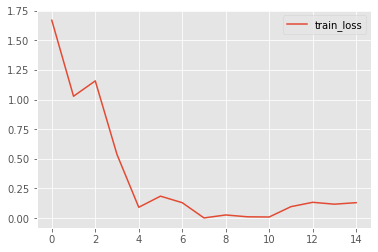

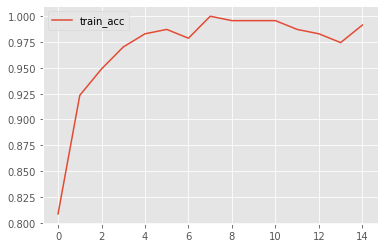

In [12]:
# Plot the loss
plt.plot(history.history['loss'],label = 'train_loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'],label='train_acc')
plt.legend()
plt.show()

In [13]:
model.save('Road_Classification.h5')

C:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [14]:
model = tf.keras.models.load_model("Road_Classification.h5")

In [15]:
import cv2 as op

Dirty Road
100.0 %


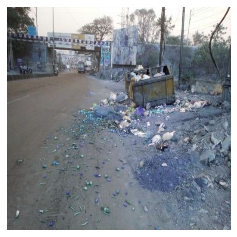

In [21]:
IMG_DIR = r'C:\Users\Asus\Desktop\ML (self work)\Deep Learning\Projects\Road\Evaluate\30.jpg'

img = op.imread(IMG_DIR)
img = op.resize(img, (224,224))
img = img/255
img_pred = img.reshape(1,224,224,3)

plt.matshow(img)
plt.axis("off")

pred = model.predict(img_pred)
pred_argmax = np.argmax(pred)
prediction = "Clean Road" if pred_argmax == 0 else "Dirty Road"
print(prediction)
print(np.max(pred)*100, "%")